In [1]:
import pickle
headline_dat = pickle.load(open("datePredictions.pkl", "rb"))
date_tot = {}
date_neg = {}
date_pos = {}

In [2]:
headline_dat[0]

['2018-11-09',
 [('Who Has the Best Shots in Men’s Tennis?',
   array([[-0.35512877, -1.20759   ]], dtype=float32),
   'Negative')]]

In [4]:
# Added afterwards to filter out bad results
import re
import pickle
csv_split = re.compile(r"\,\s*")
comp_csv = [csv_split.split(x) for x in open("DJIACompCSV.csv")]
general_re = re.compile(r"economy|market|Dow Jones|DJIA|bear|bull|debt|earnings|quarter|shares|shareholder|dividend", re.I | re.M)
# 0 = company, 1 = search term, 2 = end, 3 = start, 4 = replaces, 5 = ticker, 

article_dat = pickle.load(open("DJIAOutfComplete2.dat", "rb"))
# 0 = term, 1 = date, 2 = abstract, 3 = headline, 4 = lead paragraph
def valid_article(headline):
    # Find the article and the search term used.
    article = next((x for x in article_dat if x[3] == headline), None)

    comp = next((x for x in comp_csv if x[1] == article[0]), None)
    # Find the company it represents
    company = comp[0]
    
    # Is the search term used in the headline or lead paragraph?
    if company in article[3] or company in article[4]:
        return True
    
    # Are any general terms used?
    if general_re.search(article[3]) != None or general_re.search(article[4]) != None:
        return True
    
    return False # Otherwise

for x in headline_dat:
    date = x[0]
    label = x[1][0][2]
    if not valid_article(x[1][0][0]):
        continue
        
    if date not in date_tot:
        date_tot[date] = 0
        date_pos[date] = 0
        date_neg[date] = 0
    date_tot[date] += 1
    if label == "Negative":
        date_neg[date] += 1
    else:
        date_pos[date] += 1

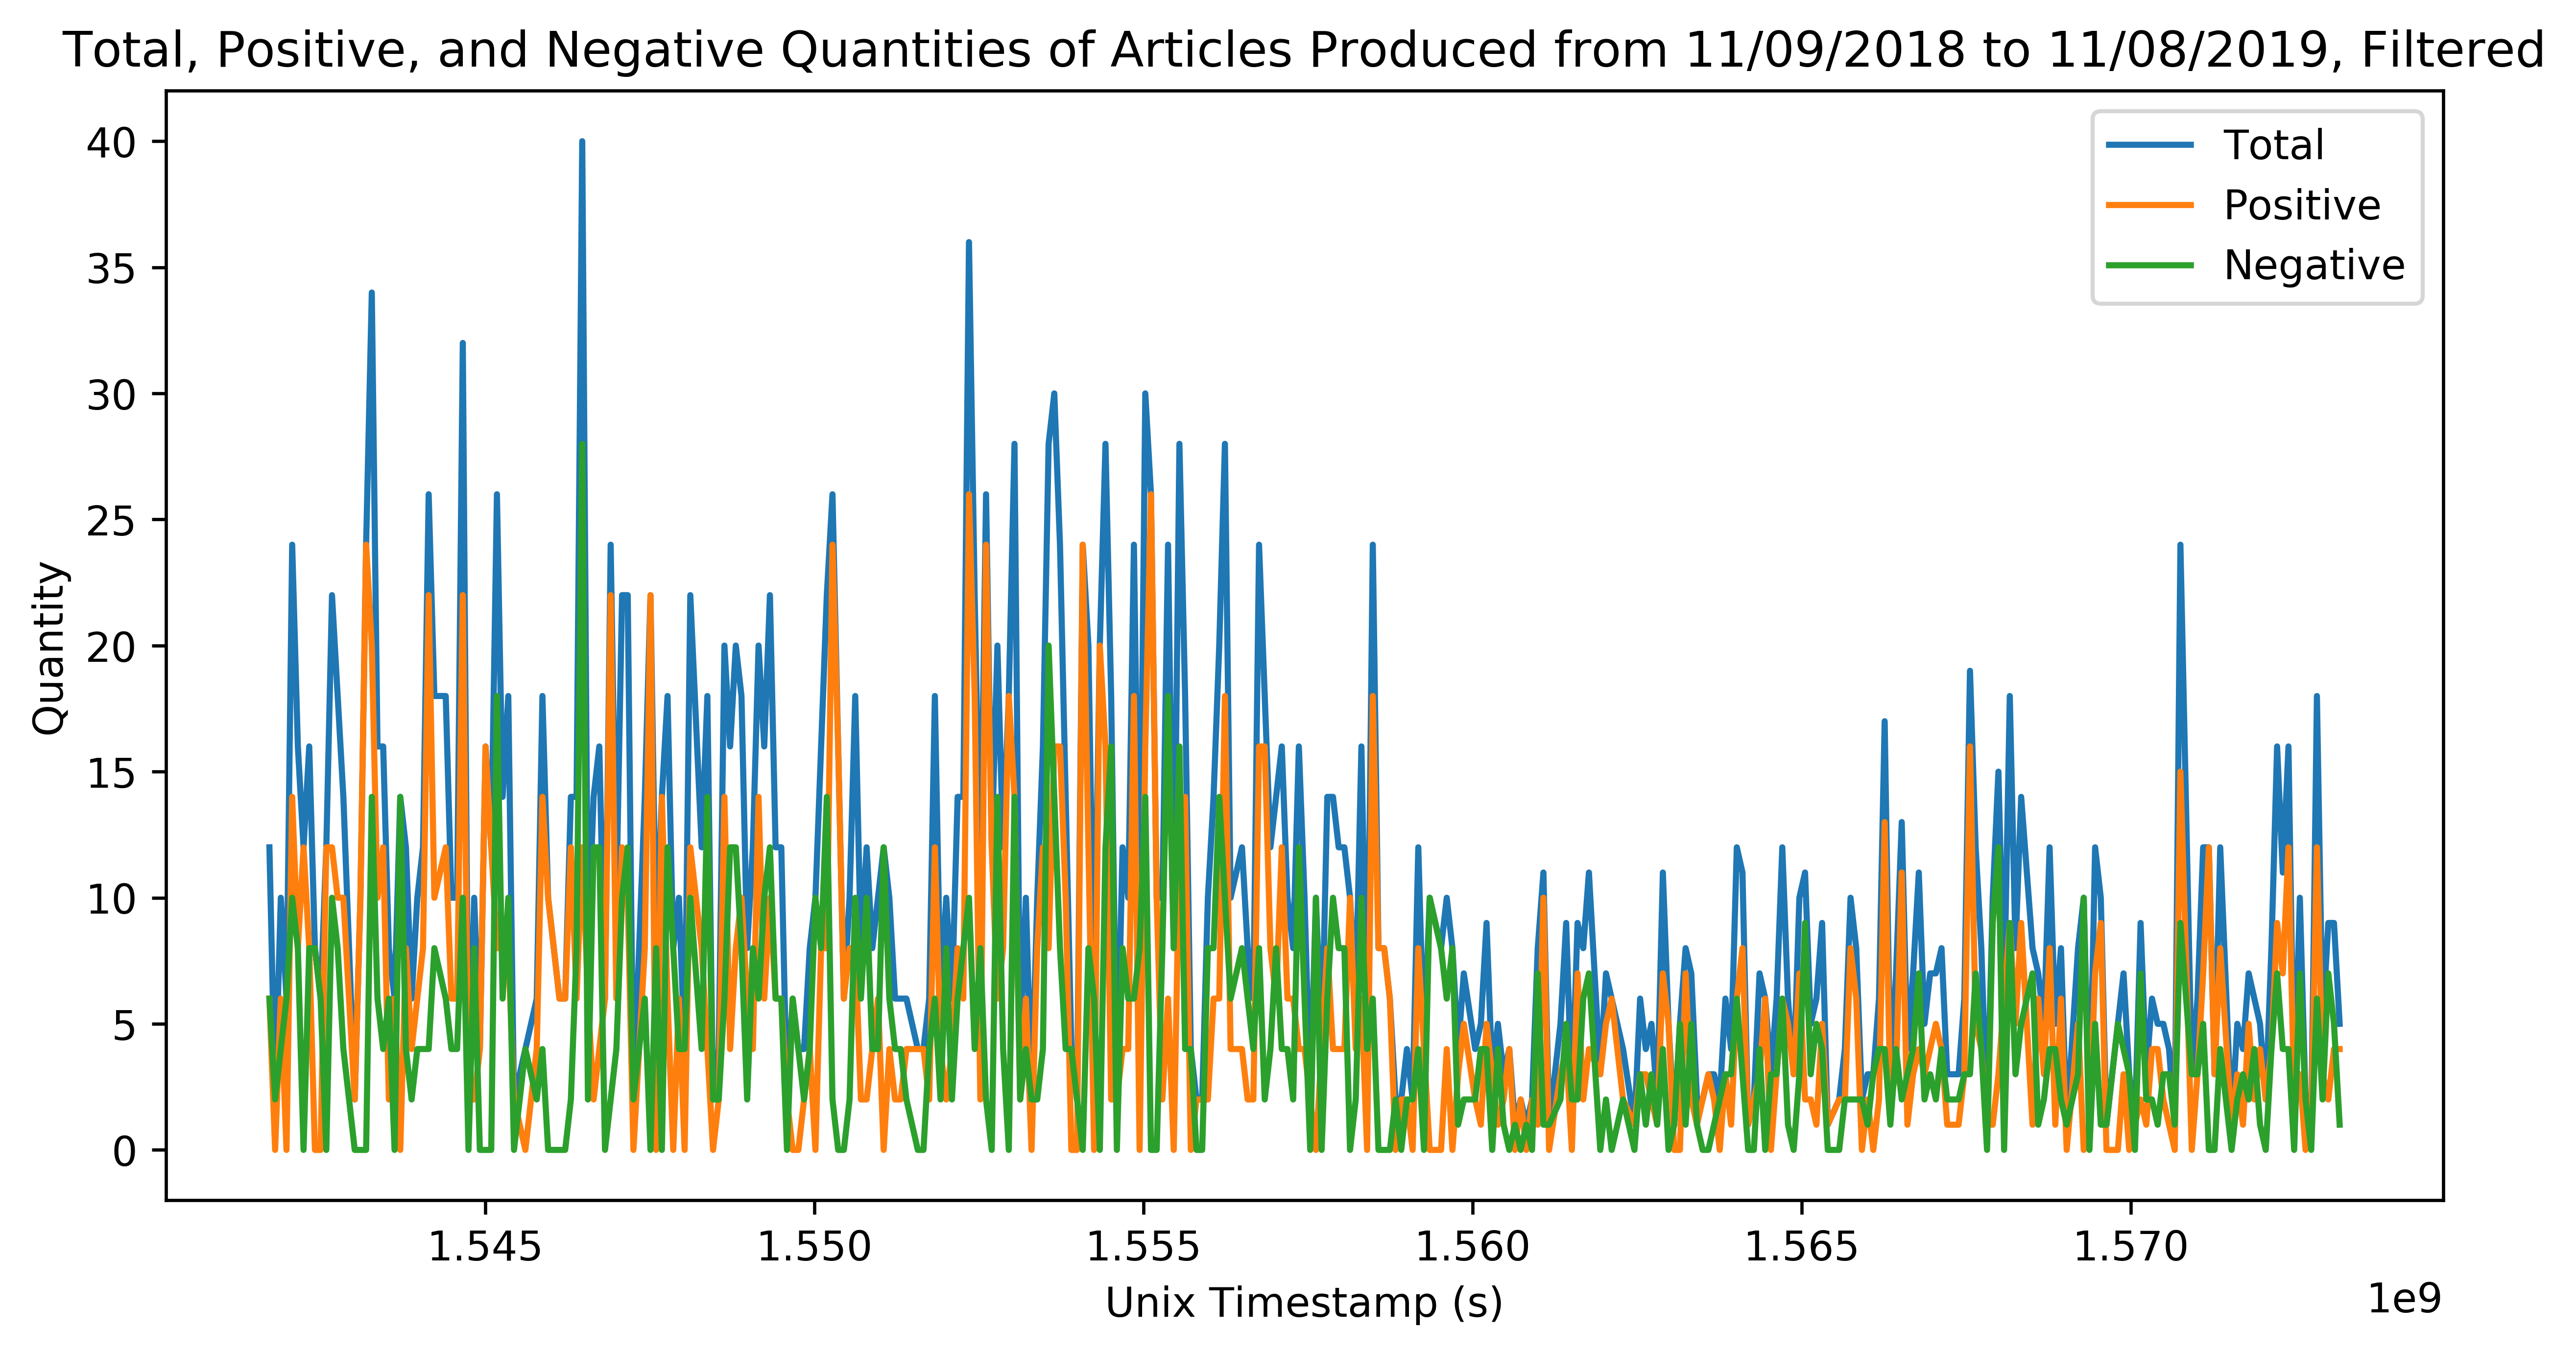

In [9]:
import matplotlib.pyplot as plt
import datetime
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 600
x = [int((datetime.datetime.strptime(x, "%Y-%m-%d") - datetime.datetime(1970, 1, 1)).total_seconds()) for x in date_tot.keys()]
plt.plot(x, [y for y in date_tot.values()], label="Total")
plt.plot(x, [y for y in date_pos.values()], label="Positive")
plt.plot(x, [y for y in date_neg.values()], label="Negative")
plt.xlabel("Unix Timestamp (s)")
plt.ylabel("Quantity")
plt.title("Total, Positive, and Negative Quantities of Articles Produced from 11/09/2018 to 11/08/2019, Filtered")
plt.legend()
plt.show()

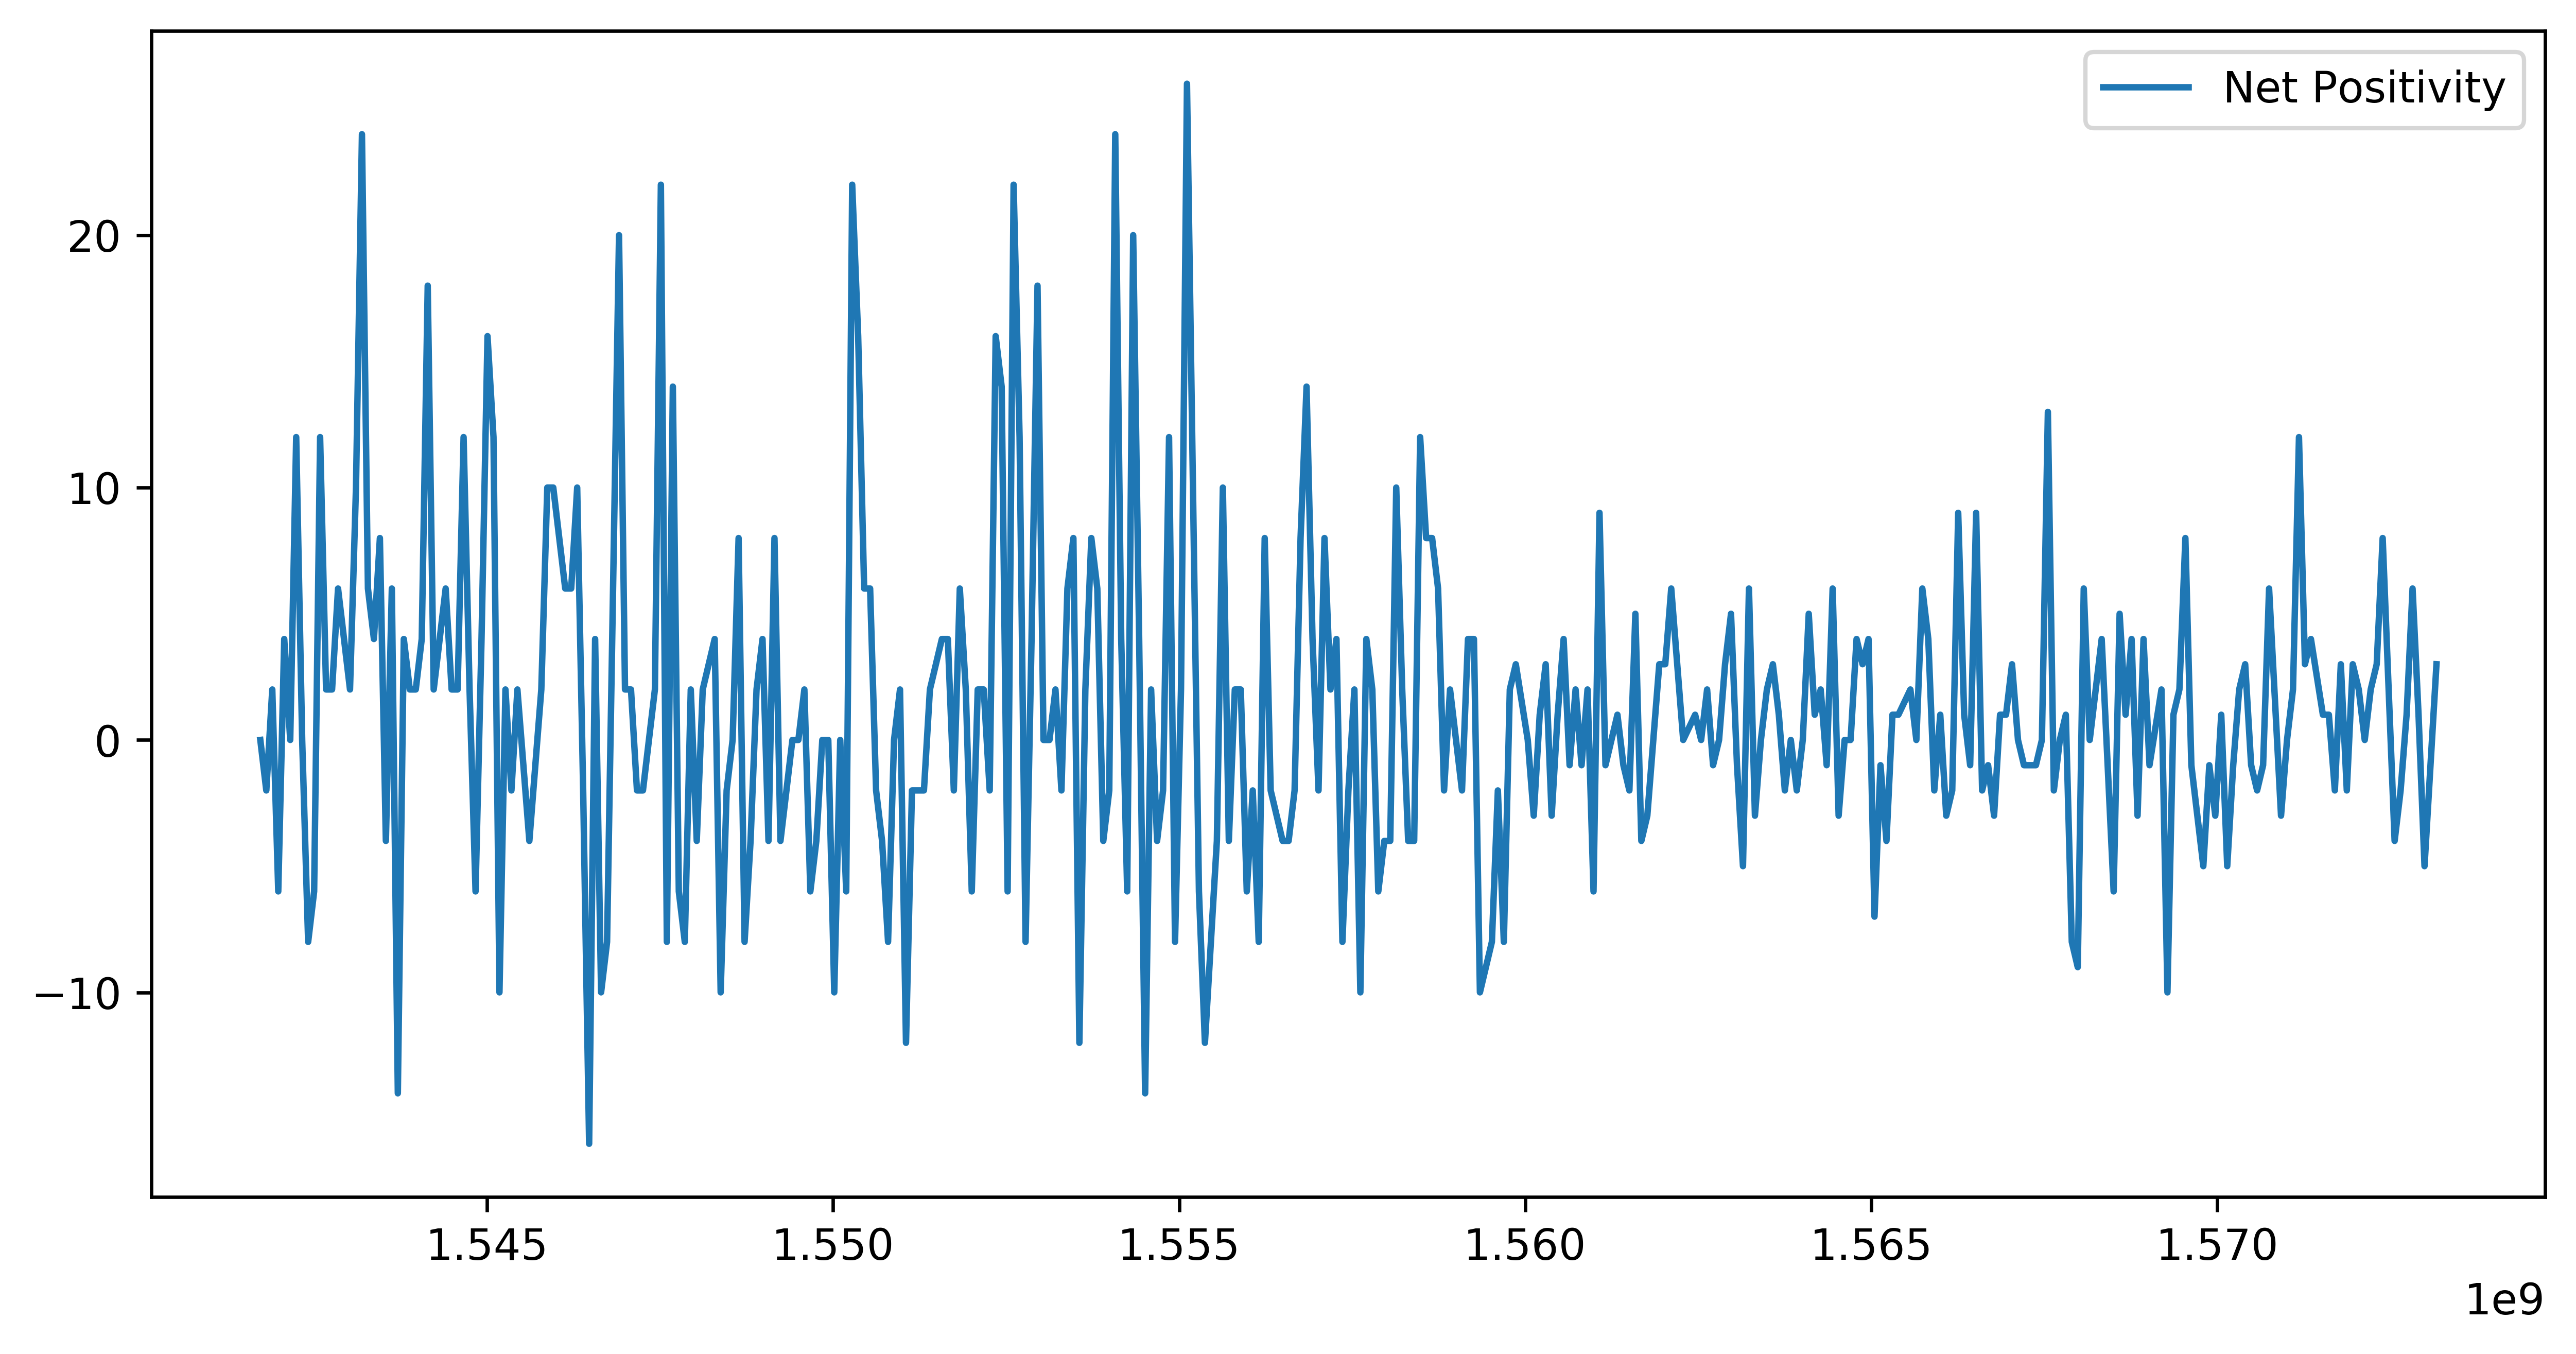

In [10]:
plt.plot(x, [y[0] - y[1] for y in zip(date_pos.values(), date_neg.values())], label="Net Positivity")
plt.legend()
plt.show()

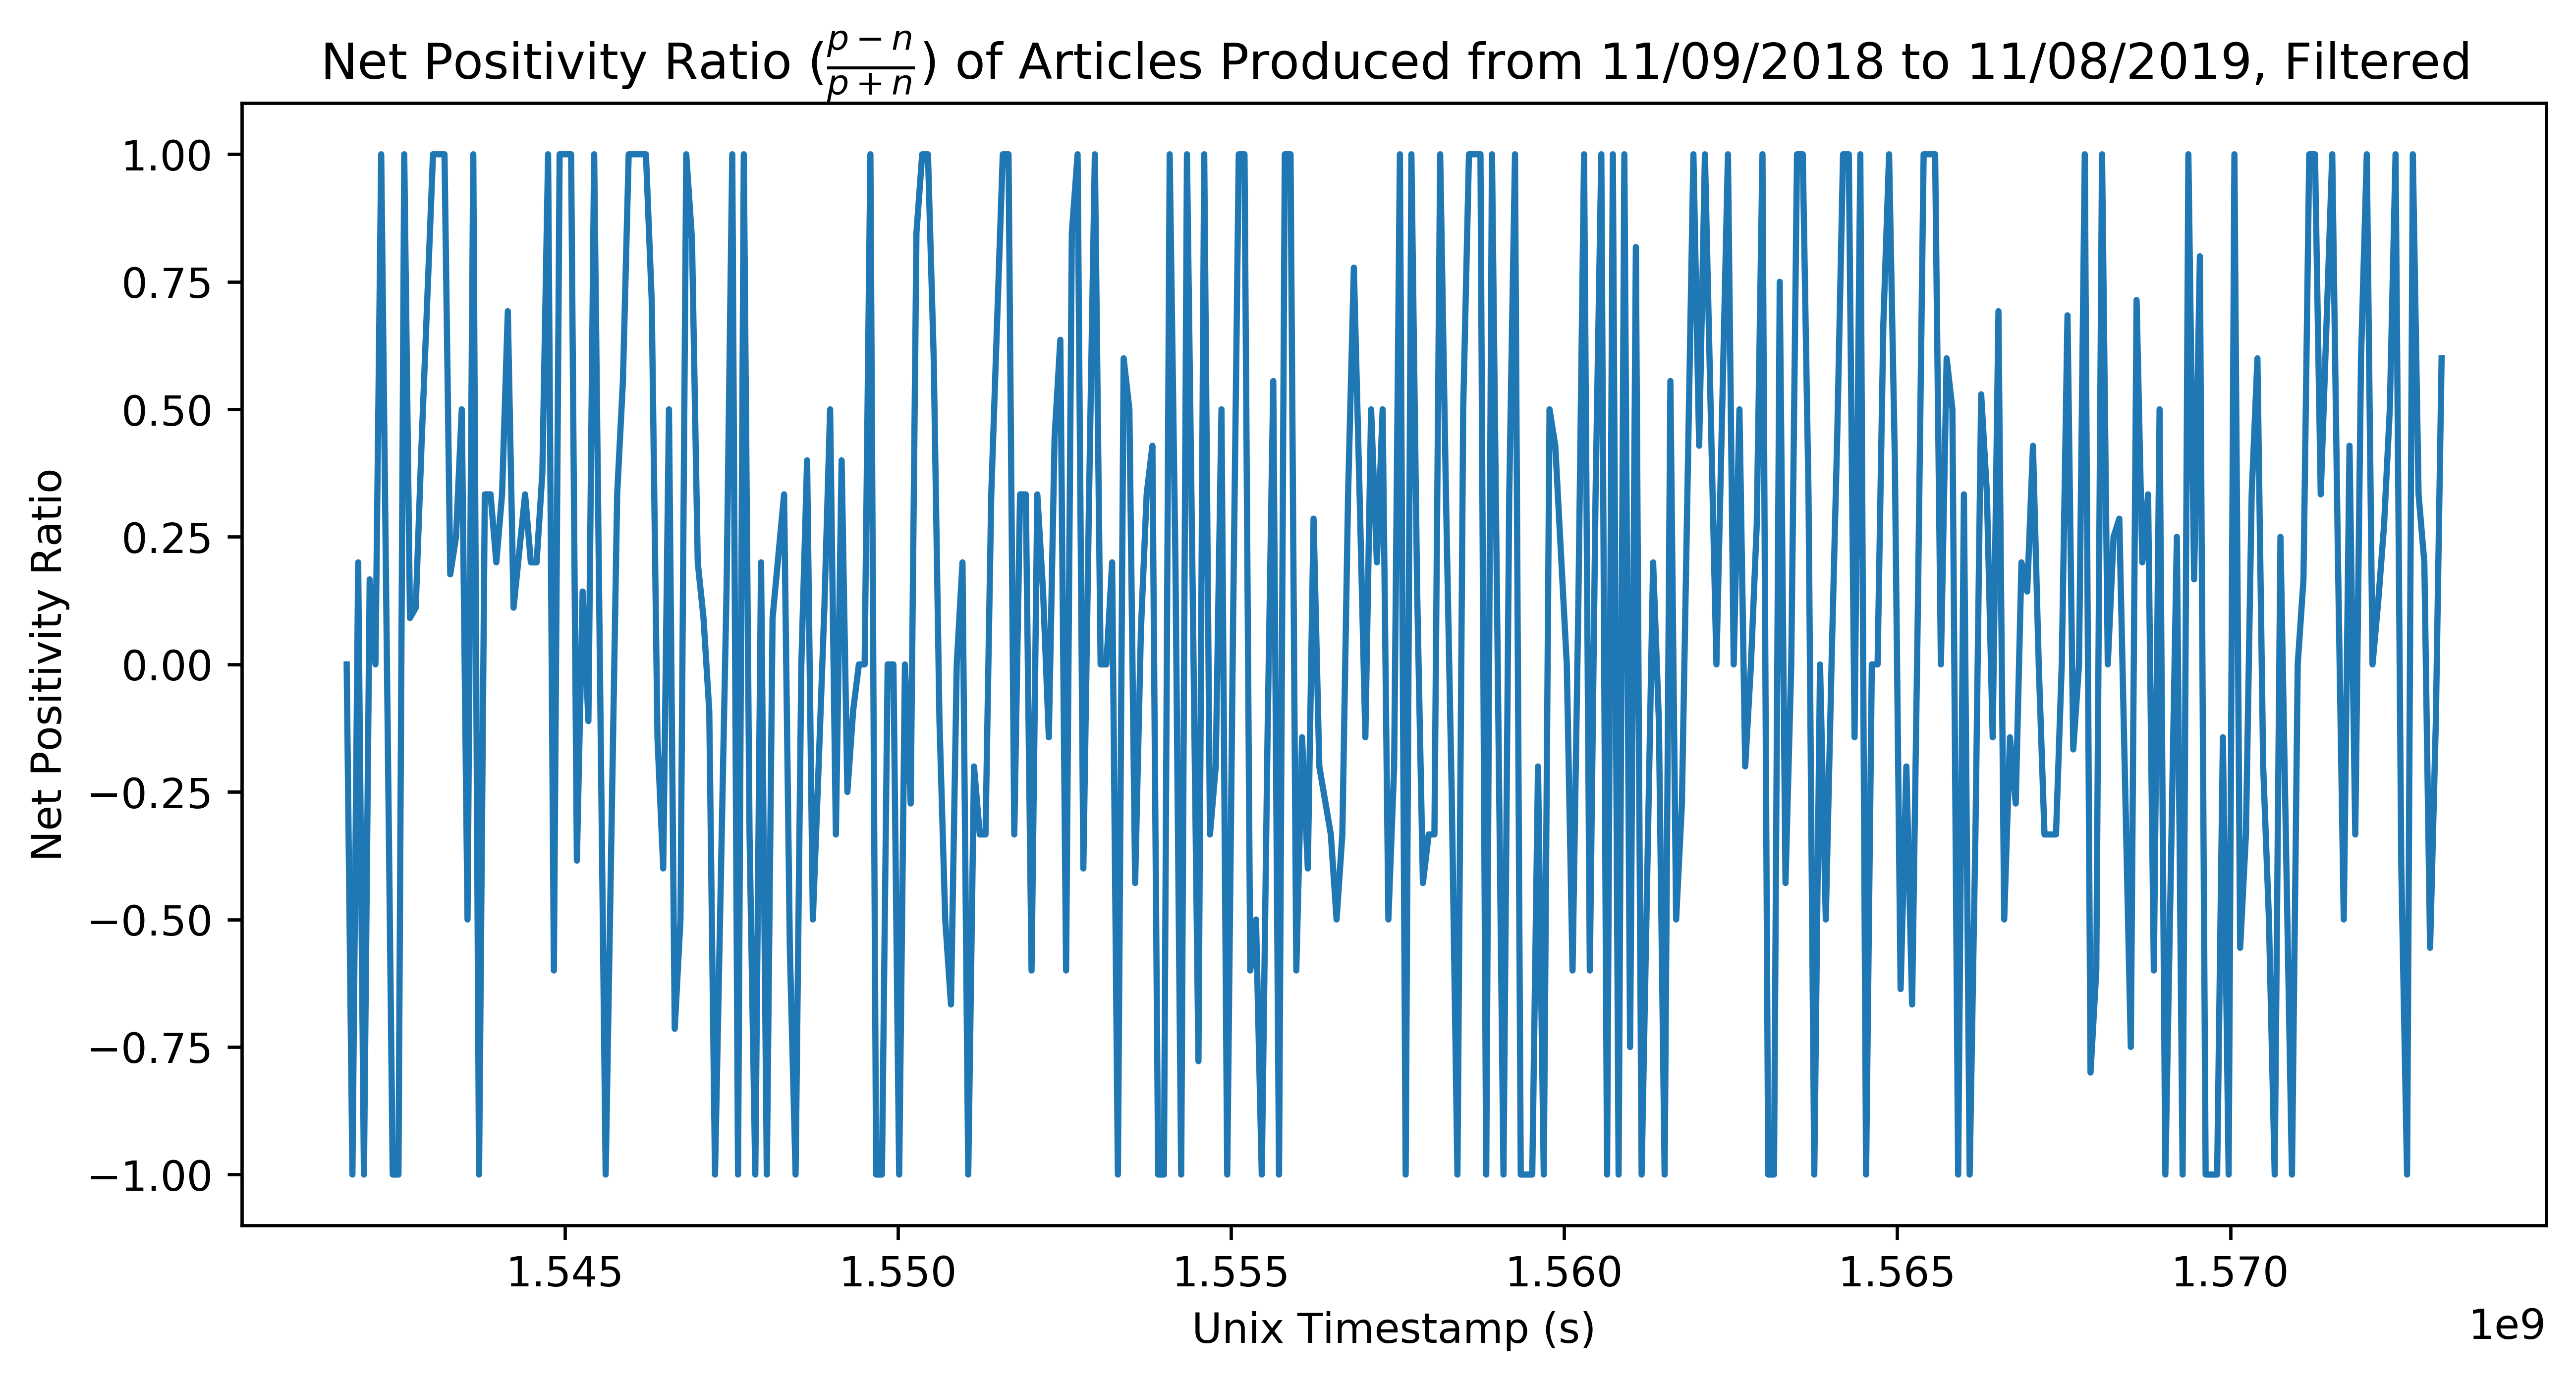

In [7]:
plt.plot(x, [(y[0] - y[1])/(y[0] + y[1]) for y in zip(date_pos.values(), date_neg.values())], label="Net Positivity Over Total")
plt.xlabel("Unix Timestamp (s)")
plt.ylabel("Net Positivity Ratio")
plt.title("Net Positivity Ratio ($\\frac{p - n}{p + n}$) of Articles Produced from 11/09/2018 to 11/08/2019, Filtered")
plt.show()

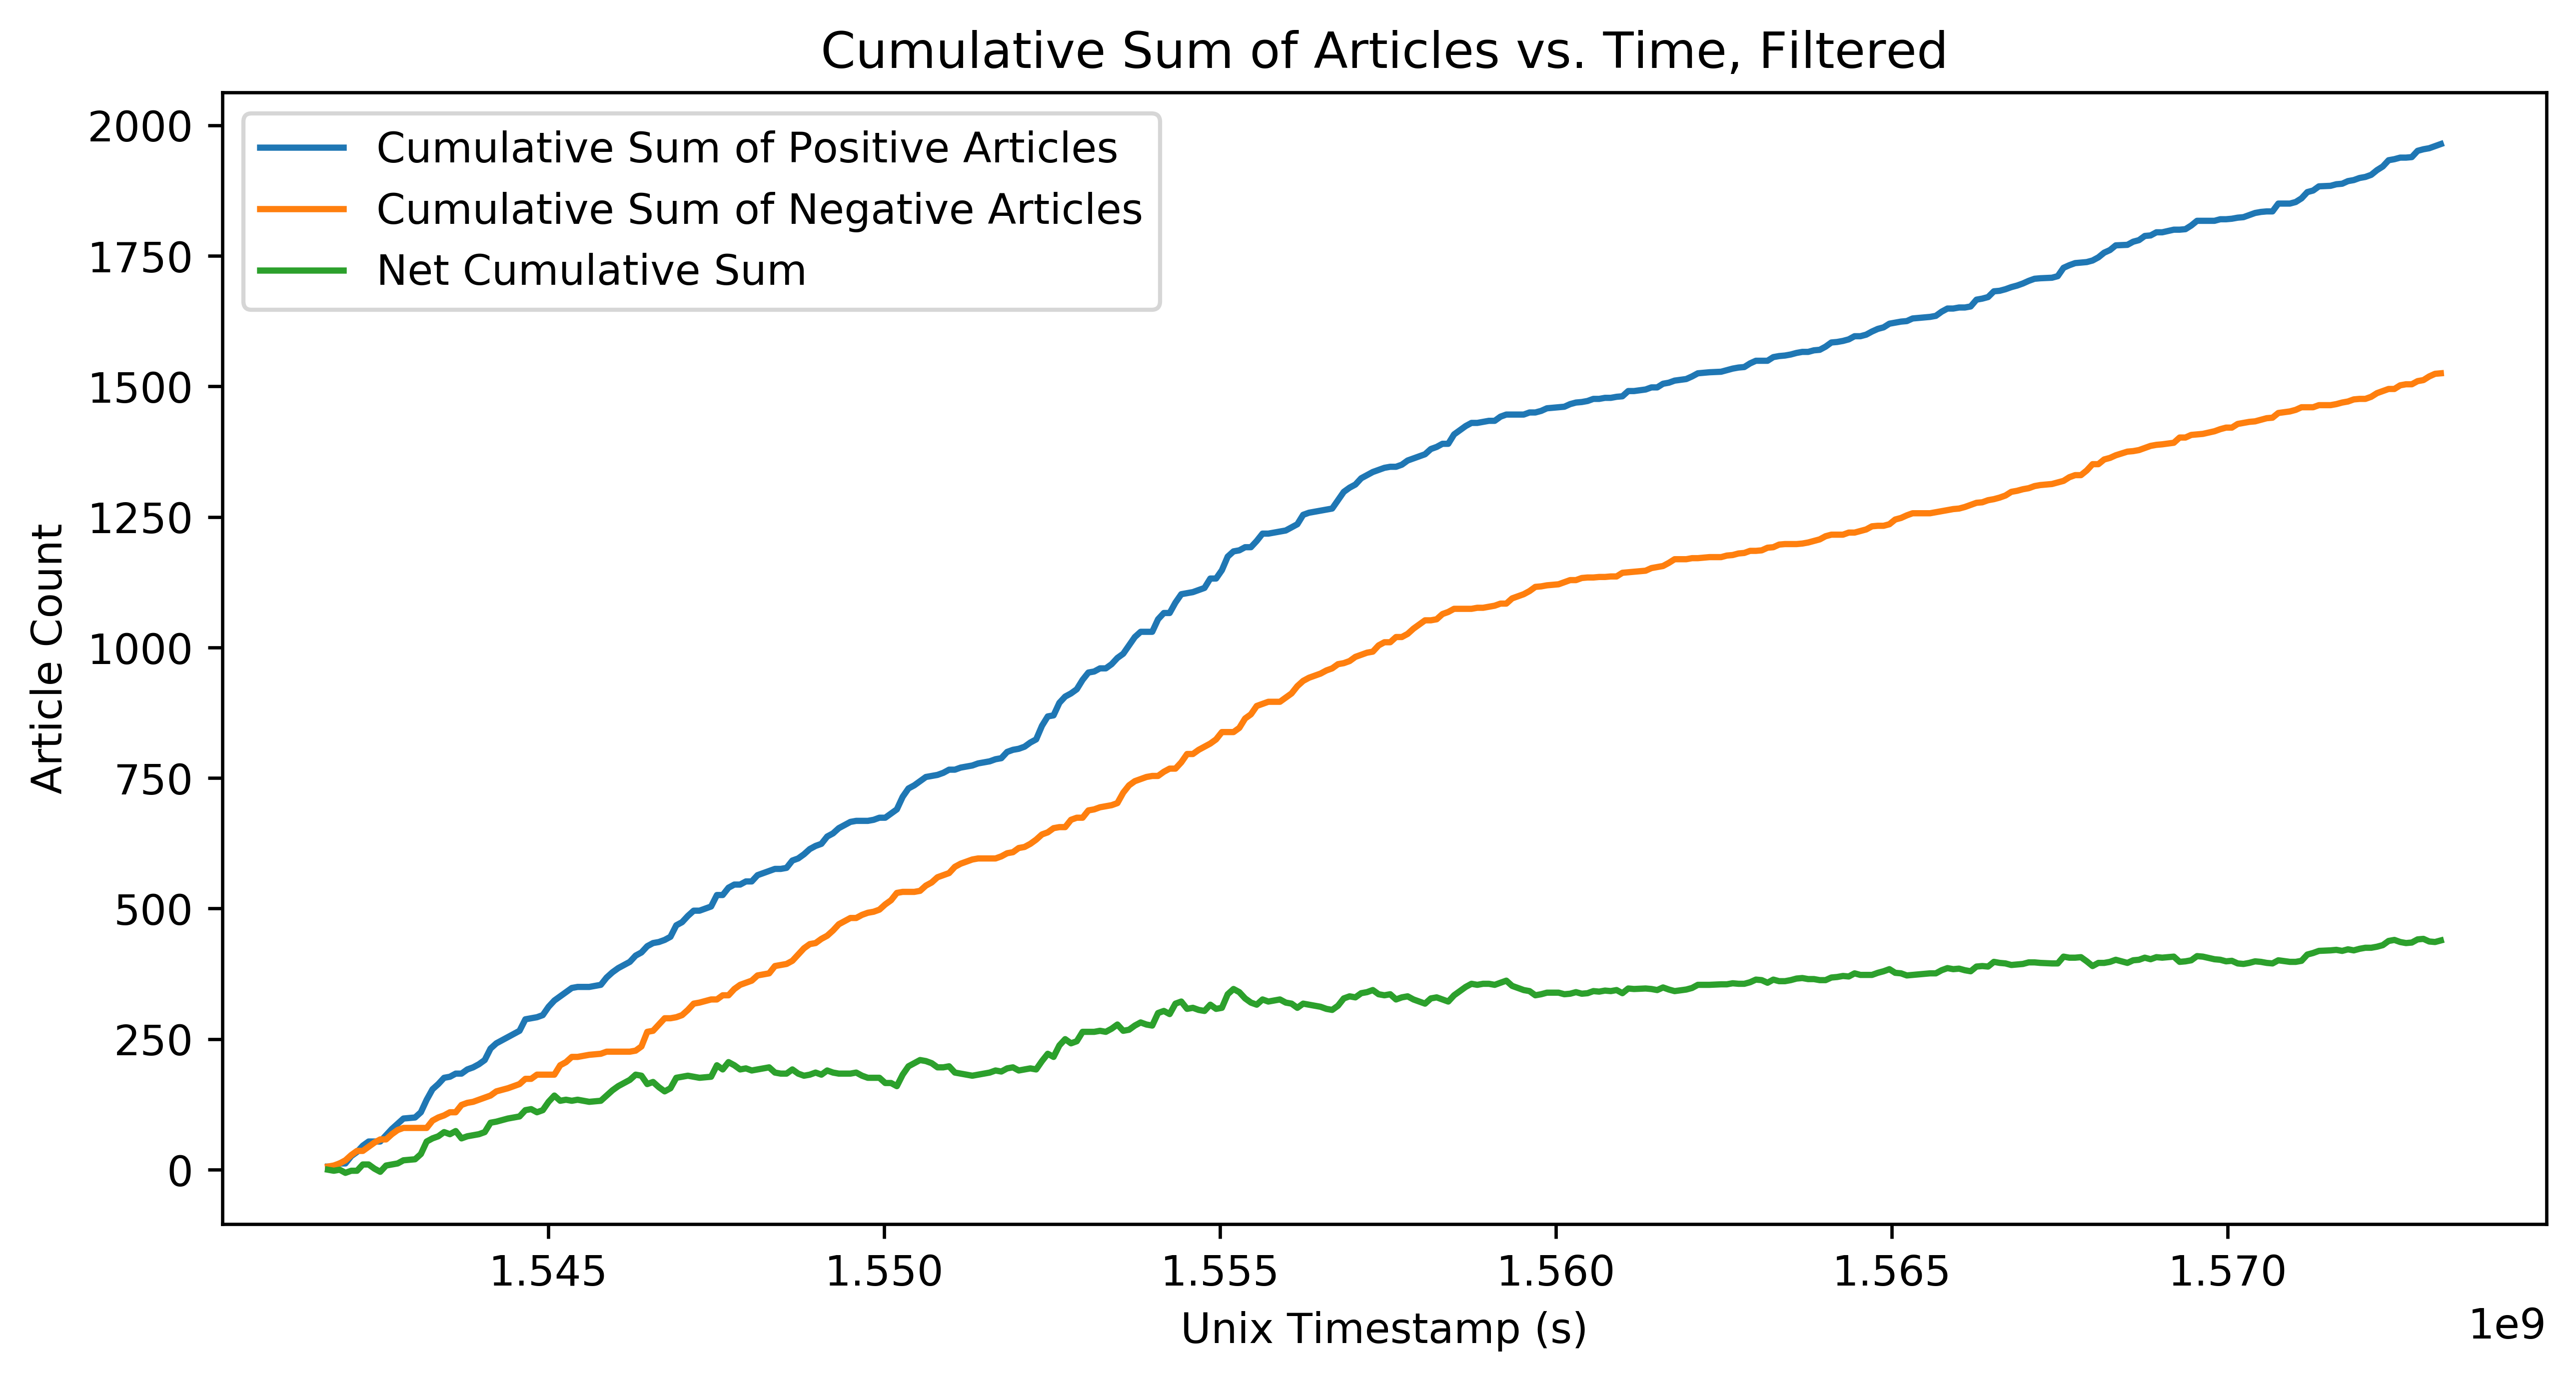

In [8]:
import numpy as np
possum = np.cumsum([y for y in date_pos.values()])
negsum = np.cumsum([y for y in date_neg.values()])
netsum = possum - negsum
plt.plot(x, possum, label="Cumulative Sum of Positive Articles")
plt.plot(x, negsum, label="Cumulative Sum of Negative Articles")
plt.plot(x, netsum, label="Net Cumulative Sum")
plt.legend()
plt.ylabel("Article Count")
plt.xlabel("Unix Timestamp (s)")
plt.title("Cumulative Sum of Articles vs. Time, Filtered")
plt.show()

In [ ]:
fout = open("DJIAHeadlines.csv", "w")
for x in date_tot.keys():
    fout.write(", ".join([str(y) for y in [x, date_tot[x], date_pos[x], date_neg[x]]]) + "\n")
fout.close()